In [1]:
import pandas as pd

df = pd.read_excel('DATA SAMPEL/dataset.xlsx') 
#It is assumed that the data has been preprocessed

In [2]:
print(df)

                                                 text label
0                                     benci  penipuan   neg
1                              gambarnya jelek sekali   neg
2                             gedung bocor becek  bau   neg
3                                        airnya kotor   neg
4                 tanahnya kurang bersih  tidak subur   neg
5   hutannya terbakar sehingga mengakibatkan polus...   neg
6           ruangan menjadi gelap karena listrik mati   neg
7                              wc mampet bikin pusing   neg
8                   pusing banget kepalaku jadi males   neg
9                        males lihat acara di senayan   neg
10                           bajuku kotor  tidak rapi   neg
11                            tidak bersih kotor  bau   neg
12                                 sedih sekali hari    neg
13                                  menyedihkan jelek   neg
14                              perilaku buruk  jorok   neg
15             harga barang mahal  tidak

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))

In [5]:
features = tfidf.fit_transform(df.text).toarray()
labels = df.label
features.shape

(50, 5)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [11]:
print(clf.predict(count_vect.transform(["dasar payah","aku sangat bahagia dan ceria"])))

['neg' 'pos']


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


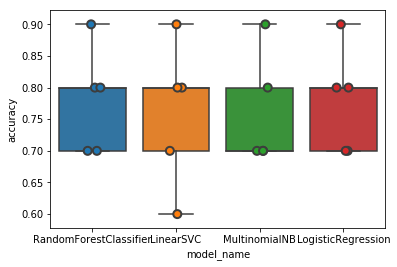

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [10]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.76
LogisticRegression        0.78
MultinomialNB             0.76
RandomForestClassifier    0.78
Name: accuracy, dtype: float64